# Robust Scaler

- Useful when feature has marginal outliers.
- Subtracts the median, and not mean.
- Does not take into account the min and max values, instead uses Inter Quantile Range (IQR).
- Hence is generally “robust” to outliers.
- But it will not completely remove outliers.
- Could be used when neither StandardScaler nor MinMaxScaler is appropriate, due to presence of outliers. 
- Does little to change shape of distribution of a feature.
- For each feature X, we calculate the median (Xmd) and two quantiles: (X0.25 and X0.75)
- For each value in that feature X (Xi), calculate:
- (X0.75 – X0.25) is called Inter Quantile Range (IQR)
- New Xi = ("Xi"  −"Xmd" )/("X" 0.75 −𝑋0.25)
- Xmd = 14
- X0.75 = 20.5
- X0.25 = 11


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [5]:
#to remove last two cols
# X = X.iloc[:, :-2]

In [6]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

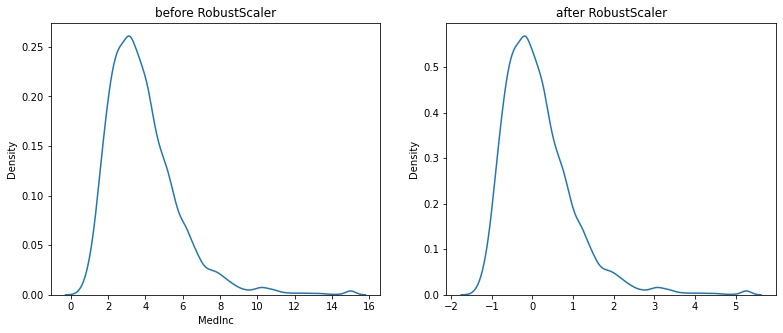

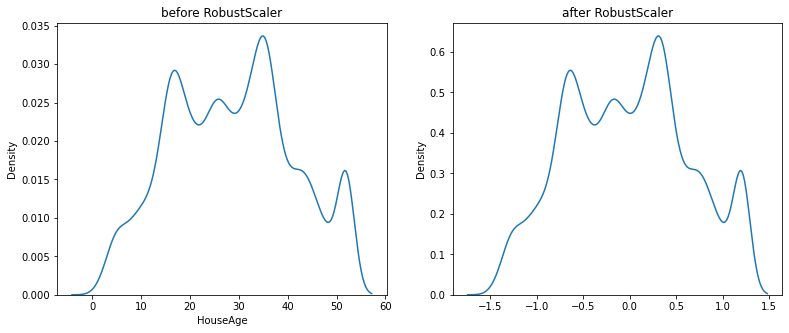

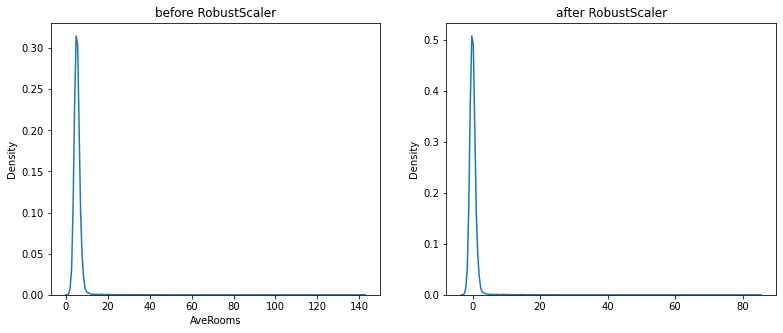

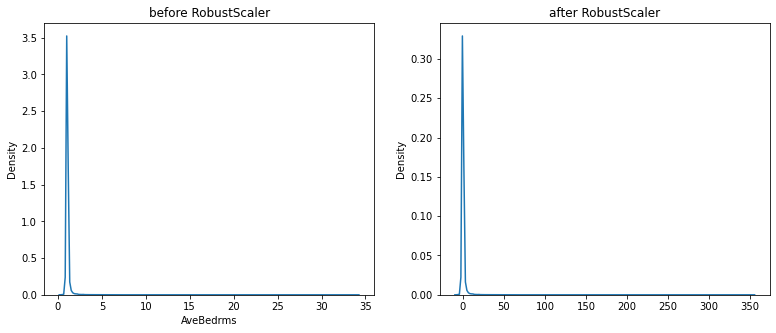

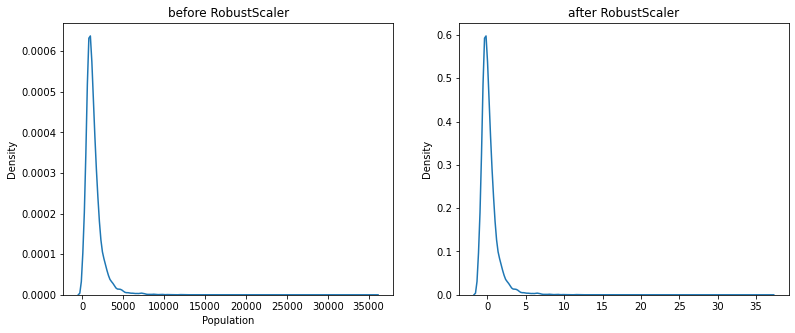

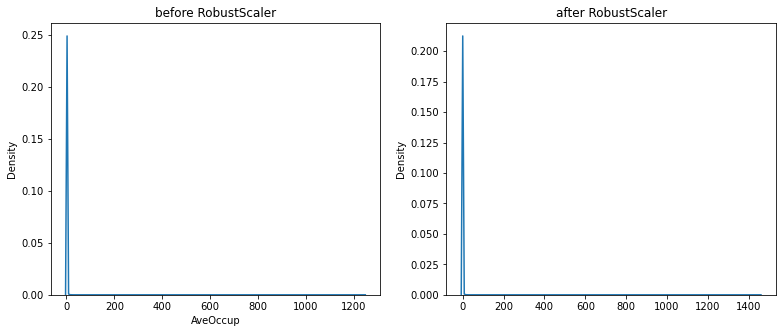

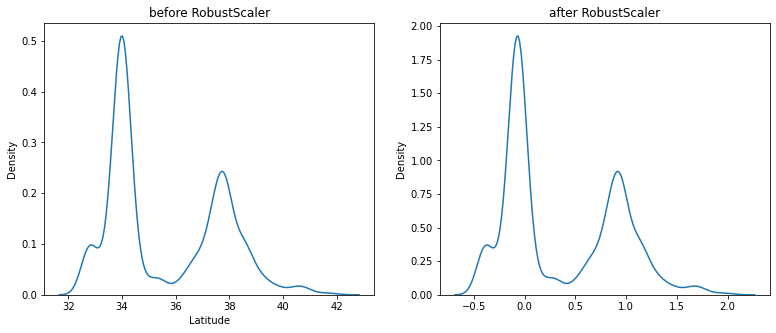

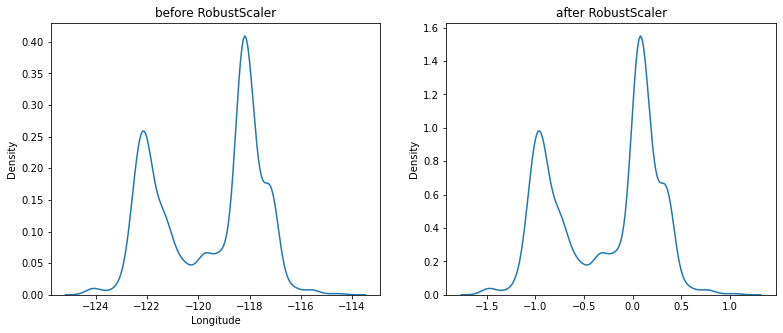

In [7]:
for col in X.columns:
    plots(X, col, RobustScaler())

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

In [9]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', RobustScaler()),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [10]:
model_accuracy_scaled(KNeighborsRegressor())

0.679645665190272

In [11]:
model_accuracy_unscaled(KNeighborsRegressor())

0.14312051440566032

In [12]:
model_accuracy_scaled(RandomForestRegressor(random_state=0))

0.798949479889898

In [13]:
model_accuracy_unscaled(RandomForestRegressor(random_state=0))

0.7986931773699132